##### Name - Shunottara Alhat

# Assignment 17 - Q1 - classify the Size_Categorie using Support Vector Machines (Forest Fire)


##### Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale

import warnings
warnings.filterwarnings('ignore')

##### Import Data

In [2]:
ForestFire = pd.read_csv("forestfires.csv")
ForestFire.drop(["monthfeb","monthjan","monthjul","monthjun","monthmar",
                 "monthmay","monthnov","monthoct","monthsep","monthapr","monthaug","monthdec",
                "dayfri","daymon","daysat","daysun","daythu","daytue","daywed"],axis=1,inplace = True)
ForestFire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## Exploratory Data Analysis 

In [3]:
# Shape
ForestFire.shape

(517, 12)

In [4]:
# Info
ForestFire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [5]:
# Descriptive
ForestFire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
# Missing Value
ForestFire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
# Duplicates
ForestFire.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

##### Numerical Variable 

In [8]:
# List of Numerical Variables
Numerical_features=[feature for feature in ForestFire.columns if ForestFire[feature].dtypes != 'O']

print('Number of Numerical Variables:', len(Numerical_features))

# Visualize the numerical variables
ForestFire[Numerical_features].head()

Number of Numerical Variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
# Discrete Feature
discrete_feature=[feature for feature in Numerical_features if len(ForestFire[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [10]:
# Continuous Feature
continuous_feature=[feature for feature in Numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


#### Categorical Variables 

In [11]:
# find categorical variables

categorical = [var for var in ForestFire.columns if ForestFire[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [12]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(ForestFire[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [13]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(ForestFire[var].value_counts()/np.float(len(ForestFire)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(ForestFire[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [15]:
# Correlation
ForestFire.corr().head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844


In [16]:
# check distribution of Sized-Category column

ForestFire['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [17]:
# view the percentage distribution of Size-Category column

ForestFire['size_category'].value_counts()/np.float(len(ForestFire))

small    0.731141
large    0.268859
Name: size_category, dtype: float64

### Data Visualization 

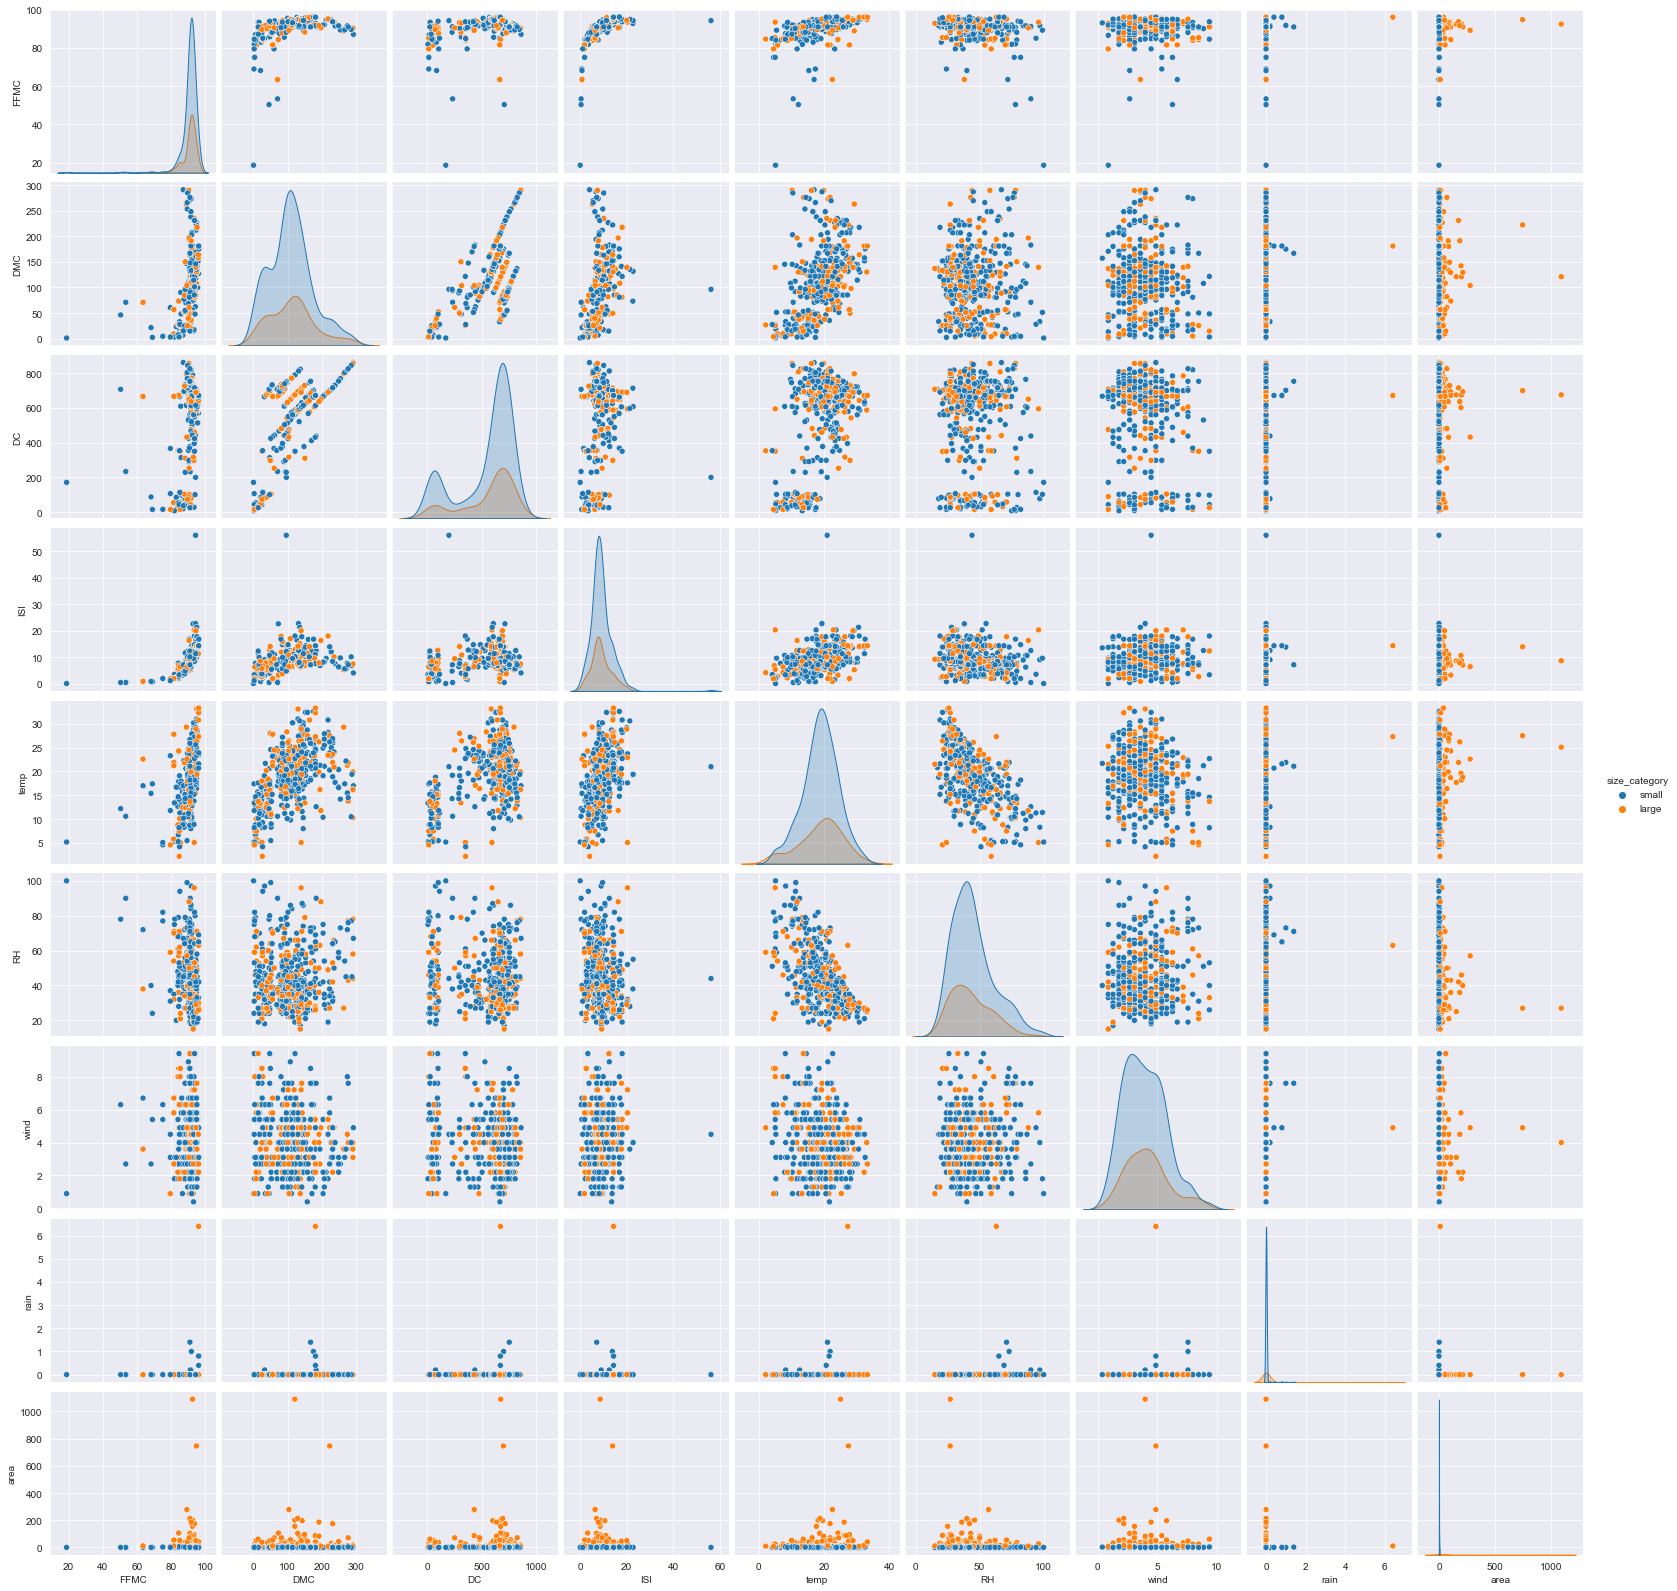

In [18]:
sns.set_style('darkgrid')
sns.pairplot(ForestFire, hue='size_category')
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

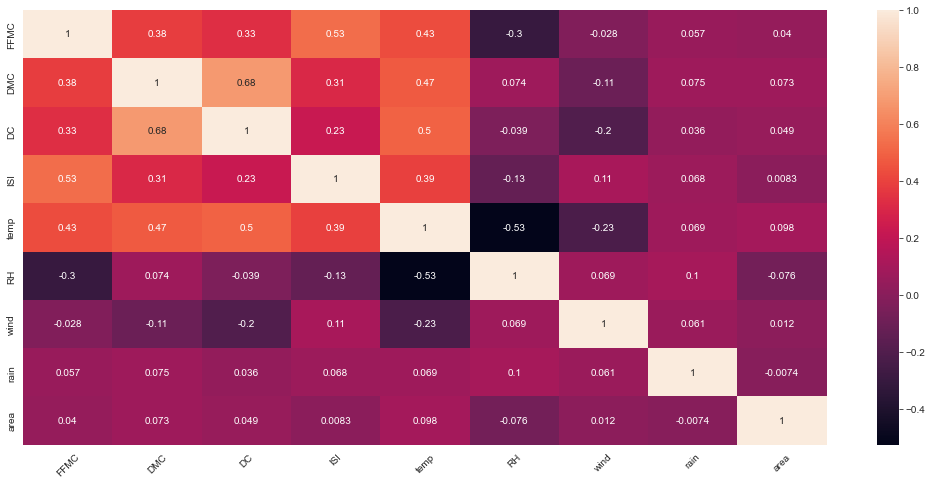

In [19]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(ForestFire.corr(), annot=True);
plt.xticks(rotation=45)

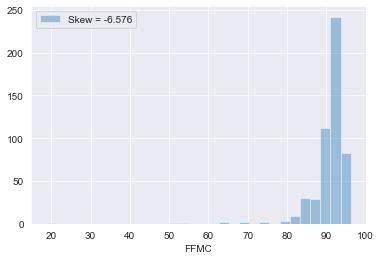

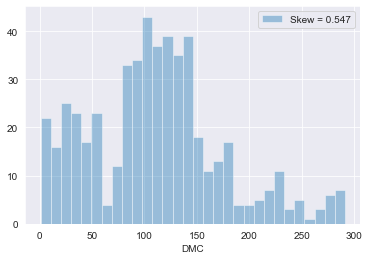

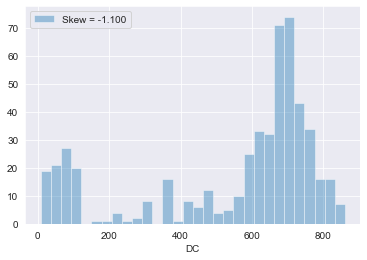

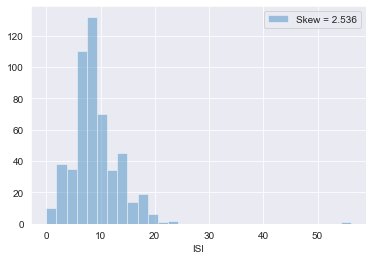

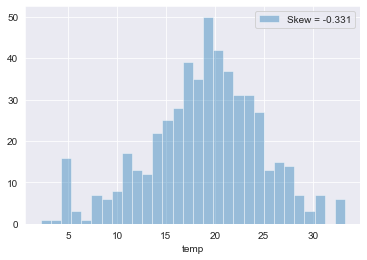

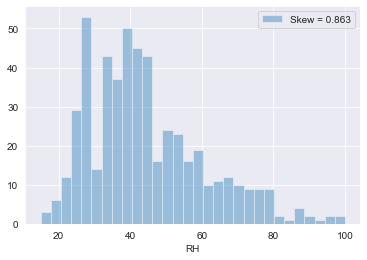

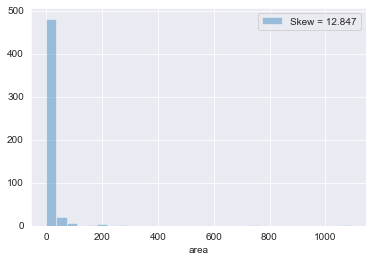

In [20]:
# Univariate plots

for feat in continuous_feature:
    skew = ForestFire[feat].skew()
    sns.distplot(ForestFire[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Outliers Detection 

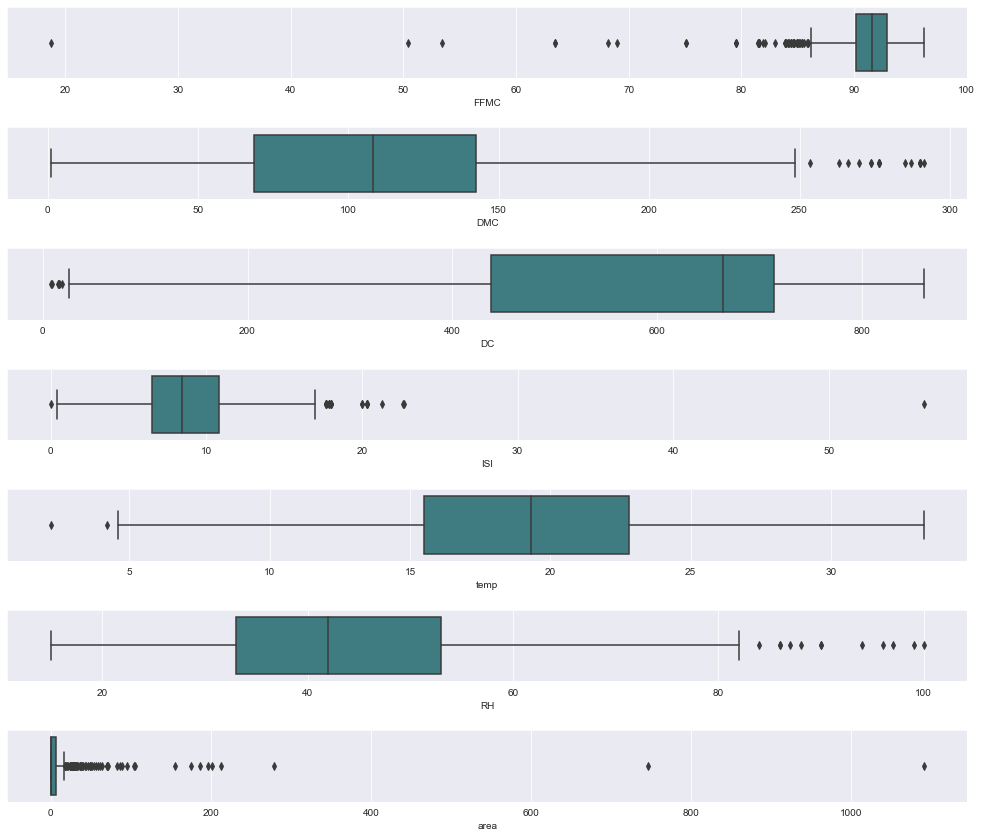

In [21]:
OT= ForestFire.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=OT,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=OT,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=OT,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=OT,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=OT,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=OT,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=OT,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

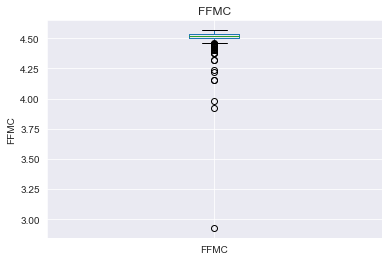

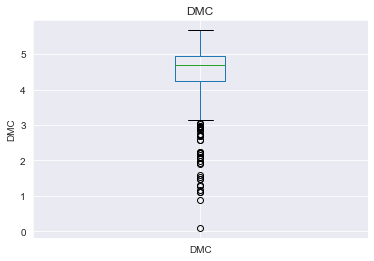

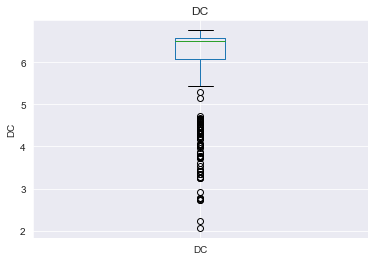

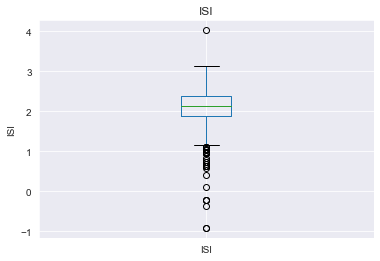

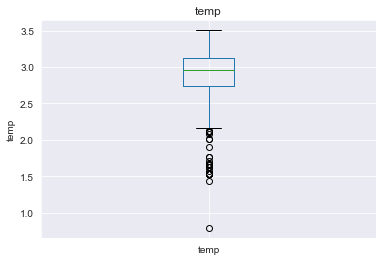

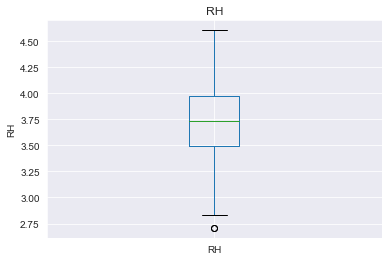

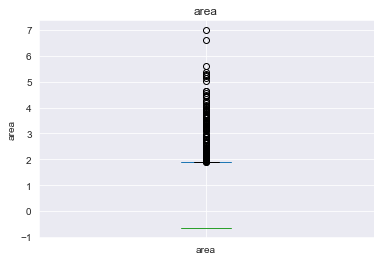

In [22]:
for feature in continuous_feature:
    Data= ForestFire.copy()
    Data[feature]=np.log(Data[feature])
    Data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


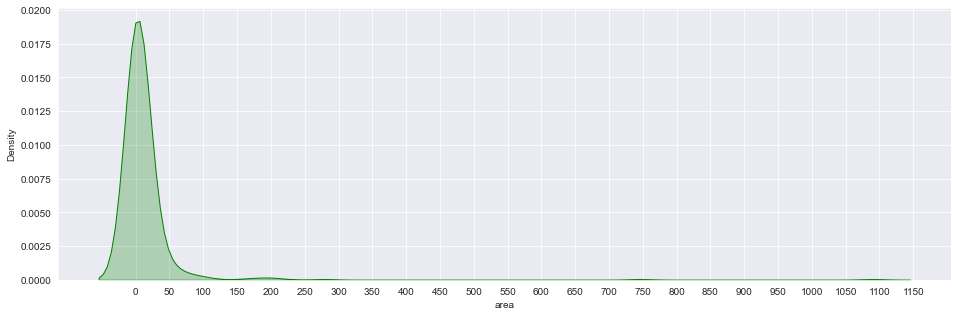

In [23]:
# Visualize the distribution of 'Area' and taking insights
plt.figure(figsize=(16,5))
print("Skew: {}".format(ForestFire['area'].skew()))
print("Kurtosis: {}".format(ForestFire['area'].kurtosis()))
ax = sns.kdeplot(ForestFire['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### Categorical Variables 

In [24]:
categorical_features=[feature for feature in ForestFire.columns if ForestFire[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
ForestFire[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [25]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(ForestFire[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


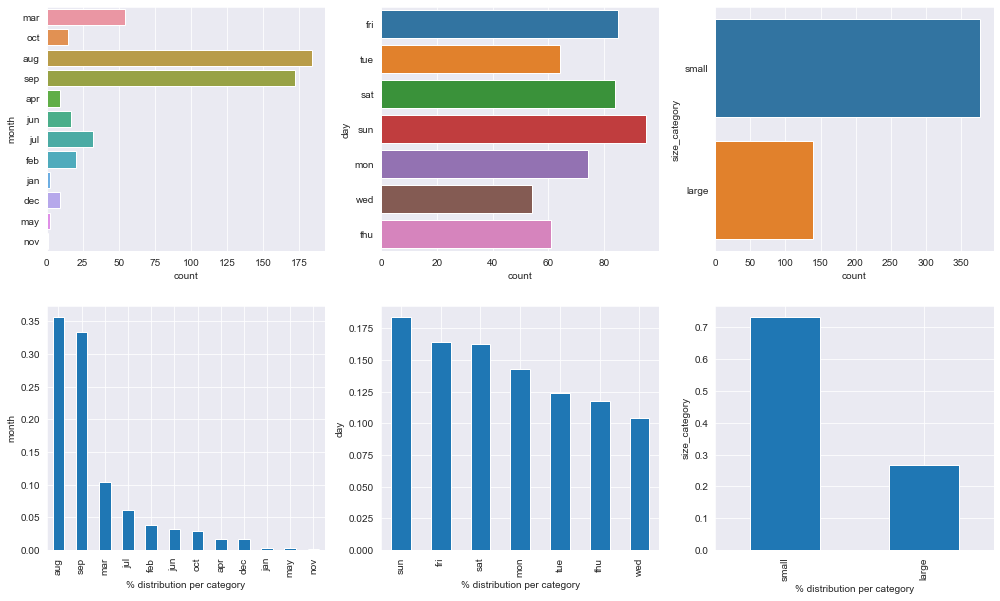

In [26]:
# Analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data= ForestFire,y=col)
    plt.subplot(3,3,i+3)
    ForestFire[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [27]:
# Bivariate Analysis for all variables in the dataset
print(ForestFire['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df = ForestFire.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()


count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


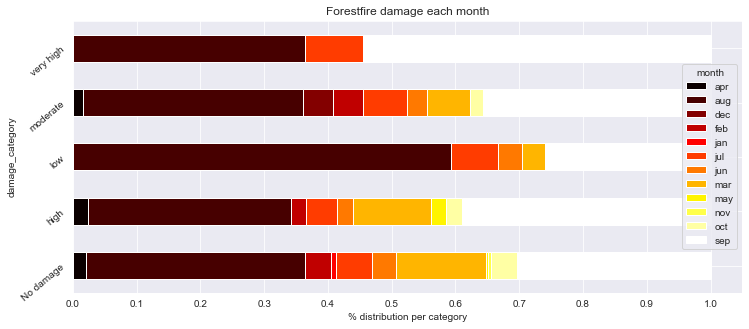

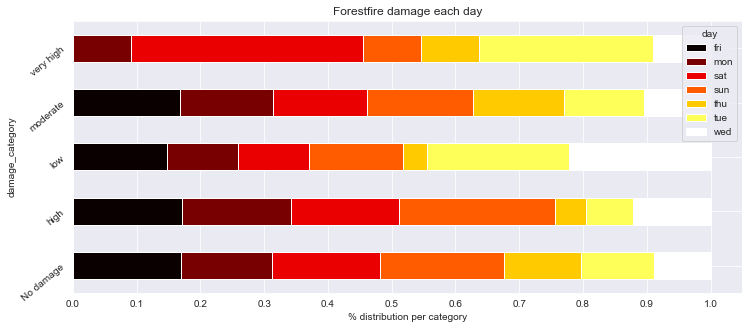

In [28]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index= df['damage_category'],columns= df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

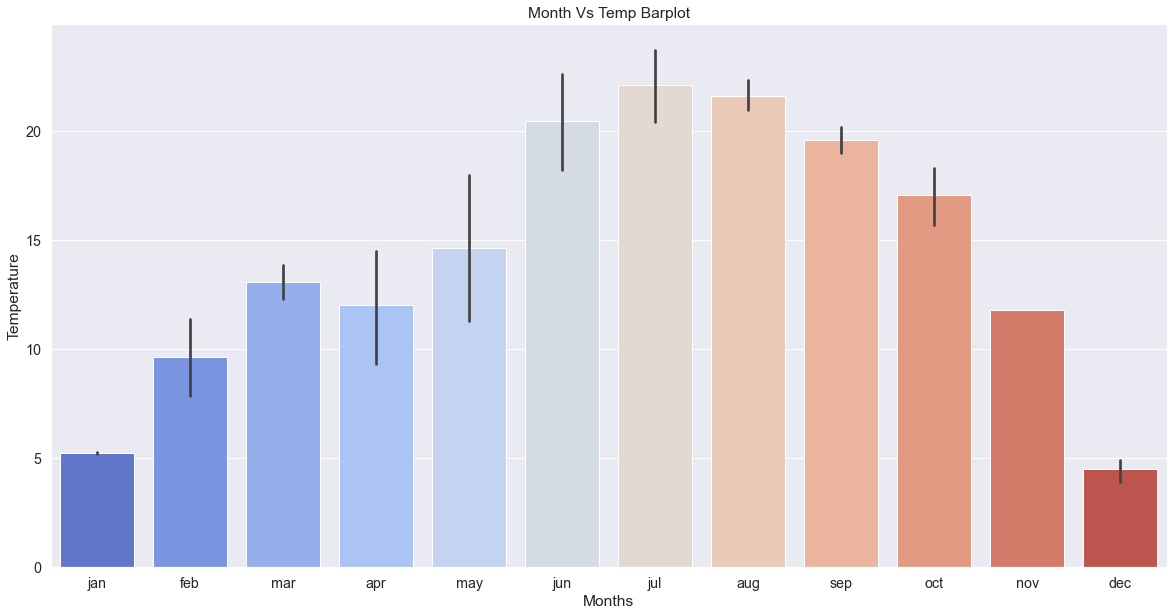

In [29]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = ForestFire,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                         palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

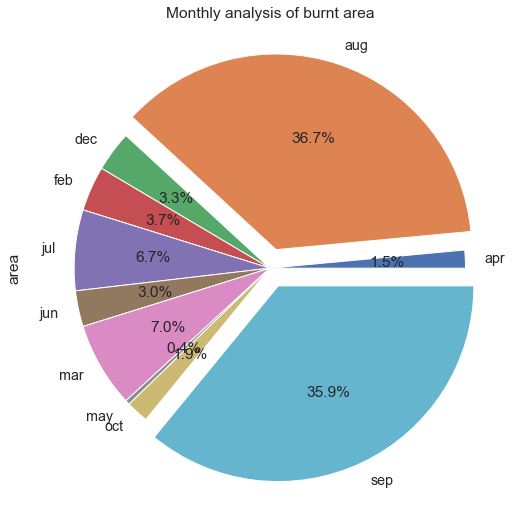

In [30]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt= ForestFire[ForestFire['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),
                                                     explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

#### Visualize the Large Forest Fire Size rate by month 

In [31]:
df1= ForestFire.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July',
                'aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,% Small Forest Fire,% Large Forest Fire
January,100.000000,0.000000
February,70.000000,30.000000
March,77.777778,22.222222
April,77.777778,22.222222
May,50.000000,50.000000
June,82.352941,17.647059
July,71.875000,28.125000
August,76.630435,23.369565
September,70.348837,29.651163
October,73.333333,26.666667


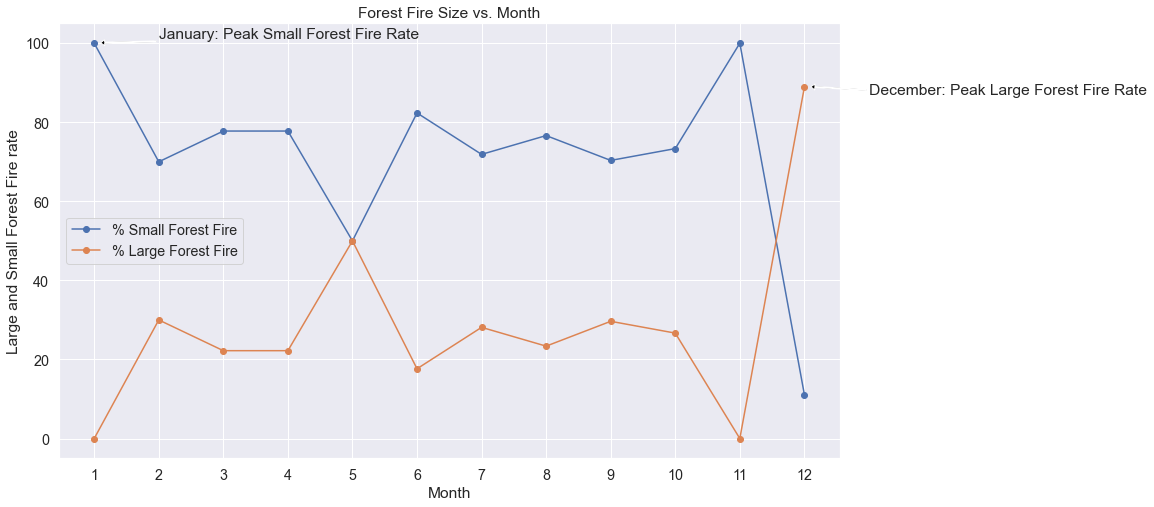

In [32]:
# Change 'month' from words to numbers for easier analysis
df1= ForestFire.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1= df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left',
             verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', 
             verticalalignment='top')

plt.show()

#### Analysis of the response column¶ 

In [33]:
ForestFire.size_category.unique()

array(['small', 'large'], dtype=object)

In [34]:
# Checking for Imbalanced or balanced dataset with regards to the Target
countsizesmall = len(ForestFire[ForestFire.size_category == 'small'])
countsizelarge = len(ForestFire[ForestFire.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(ForestFire.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(ForestFire.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [35]:
ForestFire.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Forest Fire Size Category')

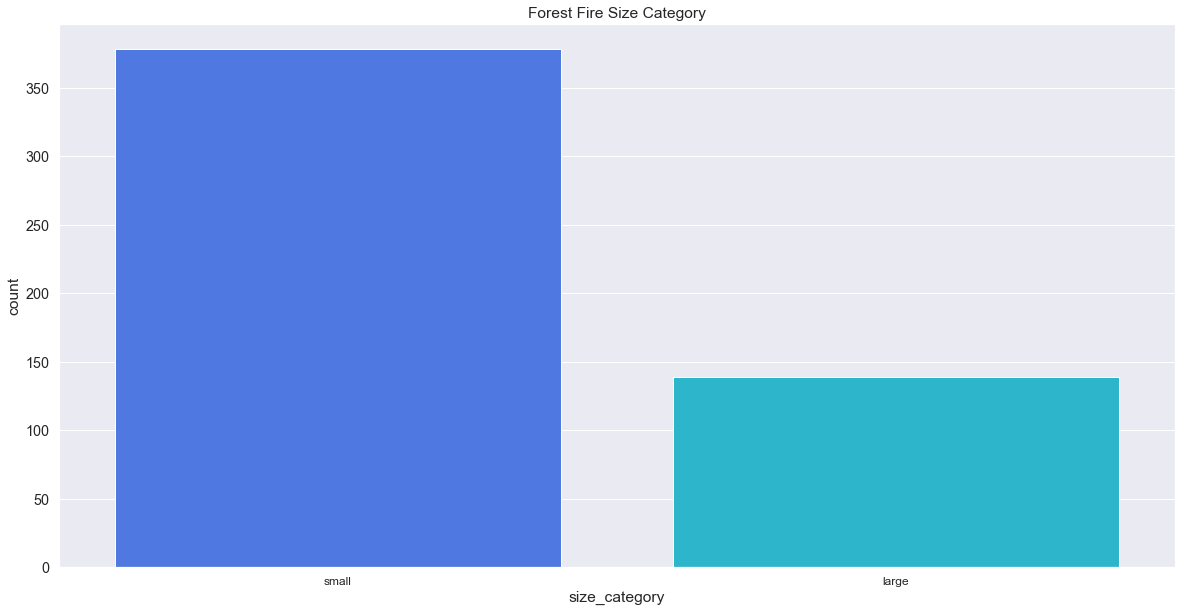

In [36]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= ForestFire, palette = pal, 
              order= ForestFire['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Forest Fire Size Category')

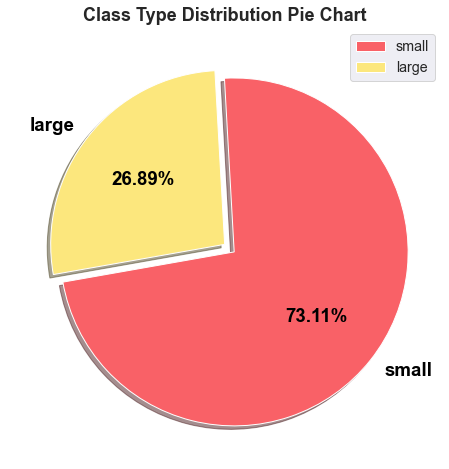

In [37]:
plt.figure(figsize = (12,8))
plt.pie(ForestFire['size_category'].value_counts(),
       labels= ForestFire.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data Pre-Processing 

##### Feature Engineering

In [38]:
continuous_feature=[feature for feature in ForestFire.columns if ForestFire[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 9


In [39]:
ForestFire[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [40]:
df_standard_scaled = ForestFire.copy()
features = df_standard_scaled[continuous_feature]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [42]:
# Mean '0' and Standard deviation '1'

print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 FFMC   -0.0
DMC     0.0
DC      0.0
ISI    -0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area   -0.0
dtype: float64 
Standard Devaition 
 FFMC    1.0
DMC     1.0
DC      1.0
ISI     1.0
temp    1.0
RH      1.0
wind    1.0
rain    1.0
area    1.0
dtype: float64 1


In [43]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,0,0,1,0,0,0


##### Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing 

In [44]:
df['size_category'] = ForestFire.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df.size_category.unique()

array([0, 1])

### Feature Selection Technique 

In [46]:
ForestFire.drop(['month','day','area'] ,axis=1, inplace= True)

In [47]:
Data_ = ForestFire.copy()
Data_.drop('size_category',axis=1, inplace =True)
Data_ = pd.get_dummies(Data_.iloc[:,:-1])
Data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind
0,86.2,26.2,94.3,5.1,8.2,51,6.7
1,90.6,35.4,669.1,6.7,18.0,33,0.9
2,90.6,43.7,686.9,6.7,14.6,33,1.3
3,91.7,33.3,77.5,9.0,8.3,97,4.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8


In [48]:
Data_['size_category'] = df1.size_category
Data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,small


In [49]:
le = LabelEncoder()
le.fit(Data_["size_category"])
Data_["size_category"]=le.transform(Data_["size_category"])
Data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,1


### Declare feature vector and target variable  

In [50]:
# split into input (X) and output (y) variables
X = Data_.drop('size_category', axis = 1)

y=  Data_.size_category

In [51]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [52]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [53]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
5,6.350054,RH
6,1.440661,wind
3,0.090542,ISI
0,0.084434,FFMC
4,0.033386,temp


## Test Train Split 

In [54]:
model_data= df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [56]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [57]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((361, 18), (156, 18))

### Run SVM with default hyperparameters 

In [58]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc =SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred= svc.predict(x_test)


In [59]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8077


#### Run SVM with rbf kernel and C=100.0 

In [60]:
# instantiate classifier with rbf kernel and C=100
svc= SVC(C=100.0) 

# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9359


#### Run SVM with rbf kernel and C=1000.0 

In [61]:
# instantiate classifier with rbf kernel and C=1000
svc= SVC(C=1000.0) 

# fit classifier to training set
svc.fit(x_train,y_train)

# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9487


### Run SVM with linear kernel 

#### Run SVM with linear kernel and C=1.0

In [63]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9103


#### Run SVM with linear kernel and C=100.0¶ 

In [64]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(x_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9679


#### Run SVM with linear kernel and C=1000.0 

In [65]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(x_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9744


### Compare the train-set and test-set accuracy 

In [66]:
y_pred_train = linear_svc.predict(x_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8892


#### Check for overfitting and underfitting 

In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test, y_test)))

Training set score: 0.8892
Test set score: 0.9103


#### Compare model accuracy with null accuracy 

In [69]:
# check class distribution in test set

y_test.value_counts()

size_category
0                114
1                 42
dtype: int64

In [71]:
# check null accuracy score

null_accuracy = (114/(114 + 42))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7308


## Run SVM with polynomial kernel

#### Run SVM with polynomial kernel and C=1.0

In [72]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C = 1.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7756


#### Run SVM with polynomial kernel and C=100.0 

In [76]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100 = SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(x_train, y_train)


# make predictions on test set
y_pred = poly_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.8974


### Run SVM with sigmoid kernel 

#### Run SVM with sigmoid kernel and C=1.0¶

In [77]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8333


#### Run SVM with sigmoid kernel and C=100.0 

In [78]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100 = SVC(kernel='sigmoid', C = 100.0) 


# fit classifier to training set
sigmoid_svc100.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C= 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C= 100.0 : 0.7564


## Confusion matrix  

In [79]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[114   0]
 [ 14  28]]

True Positives(TP) =  114

True Negatives(TN) =  28

False Positives(FP) =  0

False Negatives(FN) =  14


<AxesSubplot:>

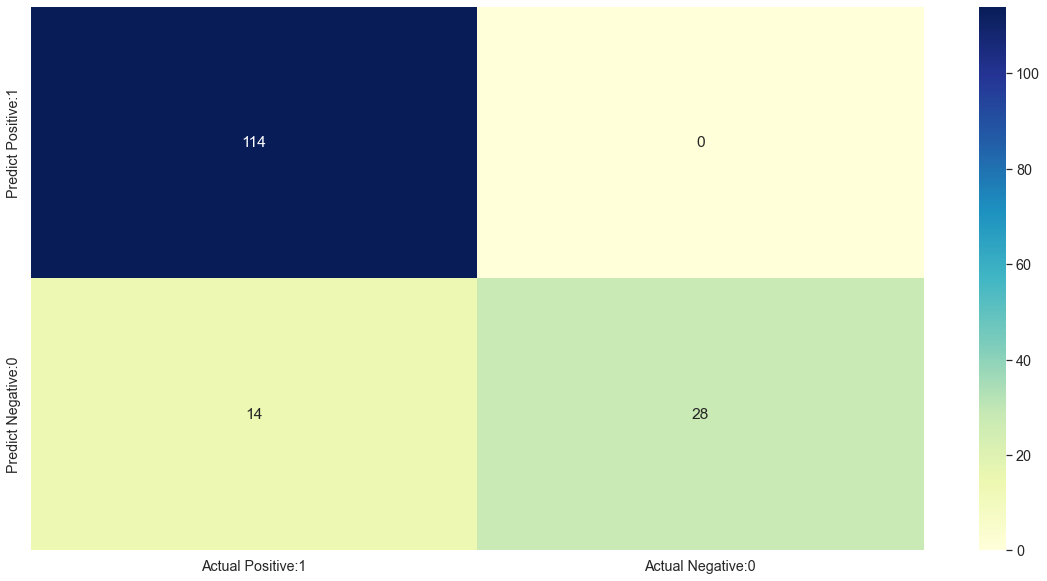

In [80]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices


#### Classification Report

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       114
           1       1.00      0.67      0.80        42

    accuracy                           0.91       156
   macro avg       0.95      0.83      0.87       156
weighted avg       0.92      0.91      0.90       156



#### Classification accuracy 

In [82]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [83]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9103


#### Classification error 

In [84]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0897


#### Precision Error 

In [85]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


#### Recall 

In [86]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8906


#### True Positive Rate 

In [87]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8906


#### False Positive Rate 

In [89]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [90]:
# Specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


##  ROC - AUC 

#### ROC Curve

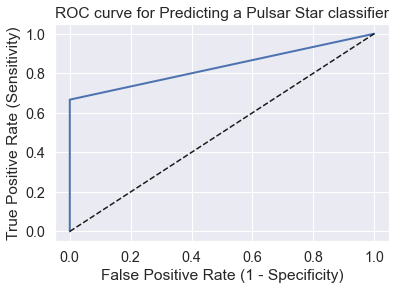

In [91]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### ROC AUC 

In [92]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8333


In [93]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, x_train, y_train, cv = 10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9945


## Stratified k-fold Cross Validation with shuffle split 


#### Stratified k-Fold Cross Validation with shuffle split with linear kernel

In [103]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')

linear_scores = cross_val_score(linear_svc, x, y, cv=kfold)

In [104]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.90384615 0.86538462 0.94174757 0.88349515 0.88349515]


In [105]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.8956


#### Stratified k-Fold Cross Validation with shuffle split with rbf kernel 

In [106]:
rbf_svc = SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, x, y, cv=kfold)

In [107]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.82692308 0.74038462 0.82524272 0.84466019 0.82524272]


In [108]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.8125


### Hyperparameter Optimization using GridSearch CV  

In [110]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = SVC() 


# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [111]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9751


Parameters that give the best results : 

 {'C': 1000, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1000, kernel='linear')


In [112]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.9744
